# Pandas et la Dataviz

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#optimisation des affichages sur notebook
%matplotlib inline

On va étudier des données AirBnB, le fichier s'appelle airbnb-paris.csv<br>
Utilisez pandas pour importer ce fichier et visualiser son contenu

In [3]:
airbnb=pd.read_csv("airbnb-paris.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (43,87) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56535 entries, 0 to 56534
Data columns (total 95 columns):
id                                  56535 non-null int64
listing_url                         56535 non-null object
scrape_id                           56535 non-null int64
last_scraped                        56535 non-null object
name                                56532 non-null object
summary                             54371 non-null object
space                               39143 non-null object
description                         56528 non-null object
experiences_offered                 56535 non-null object
neighborhood_overview               33772 non-null object
notes                               18012 non-null object
transit                             36224 non-null object
access                              28756 non-null object
interaction                         27064 non-null object
house_rules                         30186 non-null object
thumbnail_url          

In [4]:
airbnb.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,3508970,https://www.airbnb.com/rooms/3508970,20170404145355,2017-04-06,Cosy Aptmt Bastille - Gare de Lyon,Cosy petit appartement de 60m2 situé aux pieds...,NaN,Cosy petit appartement de 60m2 situé aux pieds...,none,"Marché d'Aligre, Coulée verte, Bastille, Squar...",...,9.0,f,NaN,Paris,f,moderate,f,f,1,0.46
1,13222966,https://www.airbnb.com/rooms/13222966,20170404145355,2017-04-06,Modern & bright Haussmann STUDIO (25m2 +mezzan...,This bright studio is located in an Haussmann ...,NaN,This bright studio is located in an Haussmann ...,none,NaN,...,10.0,f,NaN,Paris,f,flexible,f,f,1,0.30


Affichez des statistiques descriptives pour les variables

In [6]:
airbnb["price"].describe()

count      56535
unique       533
top       $60.00
freq        3144
Name: price, dtype: object

On va s'intéresser dans un premier temps à la variable price<br>
Que voyez-vous concernant cette variables ?<br>
Quel transformations sont nécessaires ?

In [16]:
airbnb.columns[10:15]

Index(['notes', 'transit', 'access', 'interaction', 'house_rules'], dtype='object')

In [12]:
airbnb["price2"]=airbnb["price"].str.replace("$","")
airbnb["price2"]=airbnb["price2"].str.replace(",","")
airbnb["price2"]=airbnb["price2"].astype("float")


In [4]:
airbnb["price2"]=airbnb["price"].str.replace("$","").str.replace(",","").astype("float")

In [24]:
tableau_sortie1=airbnb["price2"].agg(["mean","std","max"])

In [25]:
tableau_sortie1

mean      96.115238
std       99.304542
max     7790.000000
Name: price2, dtype: float64

On va essayer de représenter les données en utilisant l'outil scatter de matplotlib<br>
Dans un premier temps, on utilise longitude et latitude comme paramètres de la fonction scatter<br>
Que voyez-vous ?

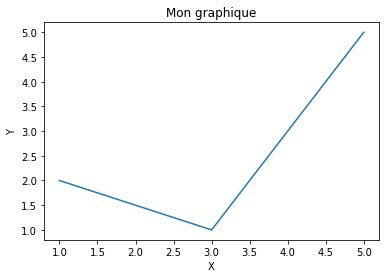

In [28]:
plt.plot([1,3,5],[2,1,5])
plt.title("Mon graphique")
plt.xlabel("X")
plt.ylabel("Y")
#plt.show()

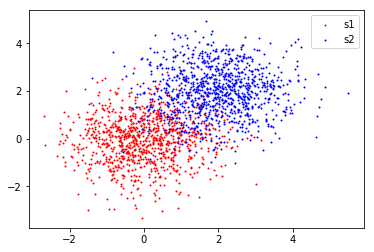

In [35]:
plt.scatter(np.random.randn(1000),np.random.randn(1000),c="red",s=1,label="s1")
plt.scatter(np.random.randn(1000)+2,np.random.randn(1000)+2,
            c="blue",s=1,label="s2")
plt.legend()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in minimum
  from ipykernel import kernelapp as app


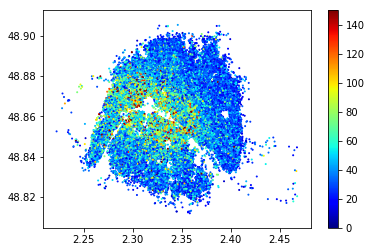

In [67]:
plt.scatter(airbnb["longitude"],airbnb["latitude"],s=1,
            c=np.minimum(150,airbnb["price2"]/(airbnb["bedrooms"]+1)),
            cmap=plt.get_cmap("jet"))
plt.colorbar()
plt.savefig("mon_paris")

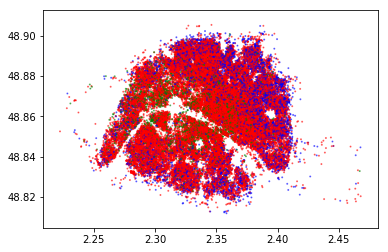

In [57]:
airbnb["couleur"]=np.where(airbnb["price2"]<50,"blue",
                           np.where(airbnb["price2"]<200,"red","green"))

plt.scatter(airbnb["longitude"],airbnb["latitude"],s=1,
            c=airbnb["couleur"],cmap=plt.get_cmap("rainbow"),alpha=0.5)
#plt.colorbar()

In [ ]:
for val, color in zip([50,100,200],["blue","red","green"]):
    plt.scatter(airbnb["longitude"],airbnb["latitude"],s=1,
            c=color,cmap=plt.get_cmap("rainbow"),alpha=0.5)
#plt.colorbar()

Pour aller plus loin, on va essayer de représenter le prix par chambre sur le graphique (on utilisera c= pour colorer en fonction de la variable)

Essayez d'améliorer ce graphique et de l'exporter

On va utiliser la bibliothèque seaborn pour avoir des représentation plus complexes (pairplot...)

In [10]:
import seaborn as sns

(array([  5.64240000e+04,   9.20000000e+01,   1.00000000e+01,
          5.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([    0.,   779.,  1558.,  2337.,  3116.,  3895.,  4674.,  5453.,
         6232.,  7011.,  7790.]),
 <a list of 10 Patch objects>)

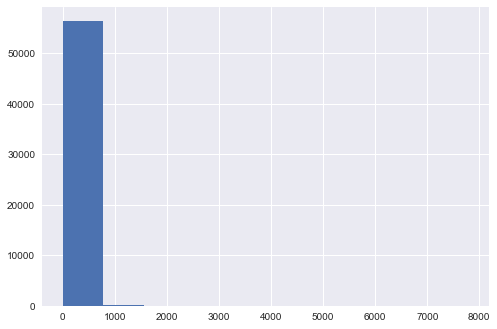

In [14]:
plt.hist(airbnb["price2"])